# Project 1 - Explortatory Data Analysis

## Introduction

For this project, I will be analysing data from a 911 call data set which I obtained from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The details are as follows. 

## Task Details 

Show step-by-step how to analyze and visualize the dataset to better understand 911 calls and what originates them.

## Expected Submission

A notebook that accomplishes the task.

## Evaluation

During the notebook try to answer the following questions:

* Which features are available in the dataset?
* How many rows and columns does the dataset have?
* Which features are categorical?
* Which features are numerical?
* Which features contain blank, null or empty values?
* What are the data types for various features?
* How many zip codes does the dataset have?
* What are the top 5 zip codes for 911 calls?
* What are the top 5 townships (twp) for 911 calls?
* How many unique title of emergency codes are there?
* What is the most common Reason for a 911 call based off of this new column?


## Import Numpy and Pandas

In [2]:
import pandas as pd
import numpy as np
import datetime

## Import Visualisation Libaries

In [3]:
import matplotlib.pyplot as plt
import collections as cn
import seaborn as sns
sns.set(style="white", color_codes=True)

## Import Data

In [4]:
dateparse = lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')

df = pd.read_csv('/Users/thomaswhite/Documents/Data Training/Python Projects/Project 1/911.csv',
    header=0,
    names=['lat', 'lng','desc','zip','title','timeStamp','twp','addr','e'],
    dtype={'lat':str,'lng':str,'desc':str,'zip':str,'title':str,'timeStamp':str,'twp':str,'addr':str,'e':int},
    parse_dates=['timeStamp'],date_parser=dateparse)

## Check Data Context

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.2978759,-75.5812935,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.2580614,-75.2646799,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.1211818,-75.3519752,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.1161530,-75.3435130,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.2514920,-75.6033497,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  object        
 1   lng        663522 non-null  object        
 2   desc       663522 non-null  object        
 3   zip        583323 non-null  object        
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663229 non-null  object        
 7   addr       663522 non-null  object        
 8   e          663522 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 45.6+ MB


The available columns are:

* lat: Latitude (String Variable)
* lng: Longitude (String Variable)
* desc: Description of the call (String Variable)
* zip: Zip Code (String Variable)
* title: Title (String Variable)
* timestamp: YYYY-MM-DD HH:MM:SS (String Variable) 
* twp: Township (String Variable)
* addr: Address (String Variable)
* e: Always set to 1 

There are a total 663522 rows with 9 columns.

categorical features:

* title
* twp

numerical features:

* lat
* lng

# Basic Questions

## What are the top 5 zipcodes for 911 calls?

In [7]:
a = df['zip'].value_counts().head(5)
a = pd.DataFrame(a)
a = a.reset_index()
a.rename(columns={"index": "zip", "zip": "Count"})

,zip,Count
0,19401,45606
1,19464,43910
2,19403,34888
3,19446,32270
4,19406,22464


## What are the 5 top townships for 911 calls?

In [8]:
a = df['twp'].value_counts().head()
a = pd.DataFrame(a)
a = a.reset_index()
a.rename(columns={"index": "Township", "twp": "Count"})

,Township,Count
0,LOWER MERION,55490
1,ABINGTON,39947
2,NORRISTOWN,37633
3,UPPER MERION,36010
4,CHELTENHAM,30574


## How many unique title codes are there?

In [9]:
df['title'].nunique()

148

## How many uniqiue zipcodes are there?

In [10]:
df['zip'].nunique()

204

# Advanced Analysis

## Creation of new features

In the title column, there is a hierachy of responses. These are the "Reasons/Departments" which are specified before the ':' in the title feature. These are EMS, Fire and Traffic. We look to create a new column that splits out this informaiton into a seperate column. 


In [11]:
df[['EmgCode','EmgReas']] = df['title'].str.split(': ',expand=True)
df[['EmgCode','EmgReas']]

,EmgCode,EmgReas
0,EMS,BACK PAINS/INJURY
1,EMS,DIABETIC EMERGENCY
2,Fire,GAS-ODOR/LEAK
3,EMS,CARDIAC EMERGENCY
4,EMS,DIZZINESS
...,...,...
663517,Traffic,VEHICLE ACCIDENT -
663518,EMS,GENERAL WEAKNESS
663519,EMS,VEHICLE ACCIDENT
663520,Fire,BUILDING FIRE


Now we have created the new columns, we want to count the distribution of EmgCode and visulaise this.

<BarContainer object of 3 artists>

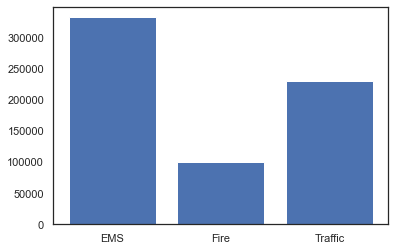

In [12]:
l = df['EmgCode']
w = cn.Counter(l)
plt.bar(w.keys(), w.values())

In [13]:
a = df['title'].value_counts().head(5)
a = pd.DataFrame(a)
a = a.reset_index()
a.rename(columns={"index" : "Reason","EmgReas" : "Count"})

,Reason,title
0,Traffic: VEHICLE ACCIDENT -,148372
1,Traffic: DISABLED VEHICLE -,47909
2,Fire: FIRE ALARM,38336
3,EMS: FALL VICTIM,34676
4,EMS: RESPIRATORY EMERGENCY,34248


# Pivot Tables

Pivot tables can be used to view the data in an alternative way, it is a great way to derive summaries from the dataset that cannot be easily made otherwise. For this excersies we will just be using EMS data.

## Creation

In [14]:
# Filtering for just EMS data, then creating a pivot table that has the emergency description at the top and the timestamp for the index
a = df[df['EmgCode'] == "EMS"]
p = pd.pivot_table(a, values='e', index='timeStamp', columns='title', aggfunc=np.sum)

# Resampling every week to summarise all data points by week
pp = p.resample('W').sum()
pp = pp.reset_index()
pp.head()


title,timeStamp,EMS: ABDOMINAL PAINS,EMS: ACTIVE SHOOTER,EMS: ALLERGIC REACTION,EMS: ALTERED MENTAL STATUS,EMS: AMPUTATION,EMS: ANIMAL BITE,EMS: APPLIANCE FIRE,EMS: ARMED SUBJECT,EMS: ASSAULT VICTIM,...,EMS: TRASH/DUMPSTER FIRE,EMS: UNCONSCIOUS SUBJECT,EMS: UNKNOWN MEDICAL EMERGENCY,EMS: UNKNOWN TYPE FIRE,EMS: UNRESPONSIVE SUBJECT,EMS: VEHICLE ACCIDENT,EMS: VEHICLE FIRE,EMS: VEHICLE LEAKING FUEL,EMS: WARRANT SERVICE,EMS: WOODS/FIELD FIRE
0,2015-12-13,18.0,0.0,8.0,15.0,0.0,0.0,1.0,0.0,11.0,...,0.0,18.0,24.0,0.0,17.0,48.0,0.0,0.0,1.0,0.0
1,2015-12-20,34.0,0.0,9.0,35.0,1.0,1.0,0.0,0.0,15.0,...,0.0,34.0,49.0,0.0,25.0,114.0,0.0,0.0,0.0,0.0
2,2015-12-27,47.0,0.0,11.0,34.0,0.0,2.0,1.0,0.0,15.0,...,0.0,23.0,42.0,0.0,30.0,141.0,3.0,0.0,0.0,0.0
3,2016-01-03,48.0,0.0,14.0,28.0,0.0,2.0,0.0,0.0,23.0,...,0.0,26.0,39.0,1.0,36.0,92.0,1.0,0.0,0.0,0.0
4,2016-01-10,43.0,0.0,8.0,46.0,0.0,2.0,1.0,0.0,19.0,...,0.0,23.0,57.0,0.0,38.0,102.0,1.0,0.0,0.0,0.0


## Visualisation



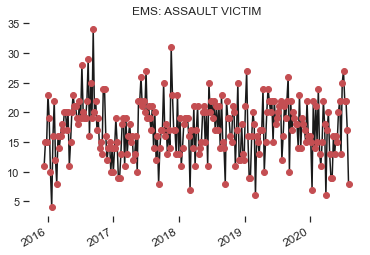

In [32]:
# Creating a red dot with line

fig, ax = plt.subplots()

# Removing spines - spines are the border of the graphical area
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

# Include ticks on the access, ticks are the marks next to the values of the axis
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=12) 

# Plot the data, of EMS: Assault Victim against the timestamp 
# 'k' gives the black line between points and 'ro' gives the red colour to the points
ax.plot_date(pp['timeStamp'], pp['EMS: ASSAULT VICTIM'],'k')
ax.plot_date(pp['timeStamp'], pp['EMS: ASSAULT VICTIM'],'ro')

# Set title and rotate x axis labels
ax.set_title("EMS: ASSAULT VICTIM")
fig.autofmt_xdate()
plt.show()



In [36]:
# Remove the first and last data points as they aren't a full week

pp = pp[pp['timeStamp'] < pp['timeStamp'].max()]
pp = pp[pp['timeStamp'] > pp['timeStamp'].min()]

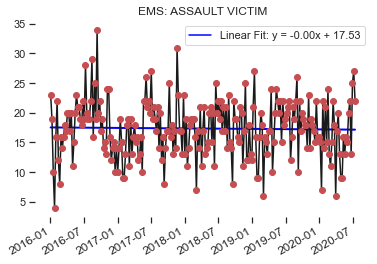

In [58]:
# We want to get the best fitting line for the data shown above

# For this we need to import legend libaries
import matplotlib.lines as mlines

# And best line of fit
from sklearn import linear_model

# Red dot with line
fig, ax = plt.subplots()

# Removing spines - spines are the border of the graphical area
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

# Include ticks on the access, ticks are the marks next to the values of the axis
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=12) 

# Plot the linear fit
Y = pp['EMS: ASSAULT VICTIM'].values.reshape(-1,1)
X = np.arange(Y.shape[0]).reshape(-1,1)

model = linear_model.LinearRegression()
model.fit(X,Y)

m = model.coef_[0][0]
c = model.intercept_[0]

ax.plot(pp['timeStamp'],model.predict(X), color = 'blue', linewidth = 2)
blue_line = mlines.Line2D([], [], color='blue', label='Linear Fit: y = %2.2fx + %2.2f' % (m,c))
ax.legend(handles=[blue_line], loc='best')


ax.plot_date(pp['timeStamp'], pp['EMS: ASSAULT VICTIM'],'k')
ax.plot_date(pp['timeStamp'], pp['EMS: ASSAULT VICTIM'],'ro')


ax.set_title("EMS: ASSAULT VICTIM")
fig.autofmt_xdate()
plt.show()

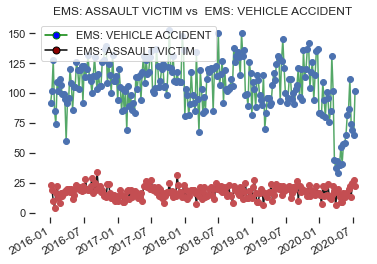

In [60]:
# We want to compare different emergency types, specifically Assault victims and Vehicle Accidents

# Need to import for legend
import matplotlib.lines as mlines

fig, ax = plt.subplots()

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  


ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=12) 


ax.plot_date(pp['timeStamp'], pp['EMS: ASSAULT VICTIM'],'k')
ax.plot_date(pp['timeStamp'], pp['EMS: ASSAULT VICTIM'],'ro')


ax.plot_date(pp['timeStamp'], pp['EMS: VEHICLE ACCIDENT'],'g')
ax.plot_date(pp['timeStamp'], pp['EMS: VEHICLE ACCIDENT'],'bo')


ax.set_title("EMS: ASSAULT VICTIM vs  EMS: VEHICLE ACCIDENT")

# Legend Stuff
green_line = mlines.Line2D([], [], color='green', marker='o',markerfacecolor='blue',
                          markersize=7, label='EMS: VEHICLE ACCIDENT')
black_line = mlines.Line2D([], [], color='black', marker='o',markerfacecolor='darkred',
                          markersize=7, label='EMS: ASSAULT VICTIM')

ax.legend(handles=[green_line,black_line], loc='best')


fig.autofmt_xdate()
plt.show()

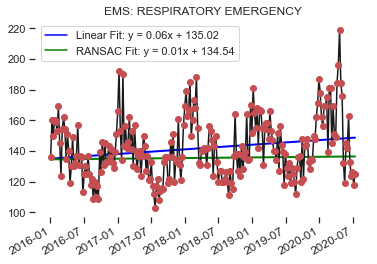

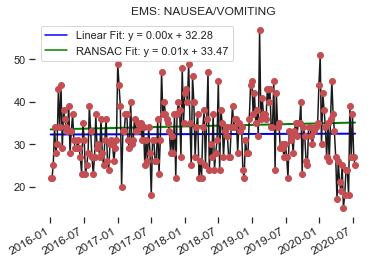

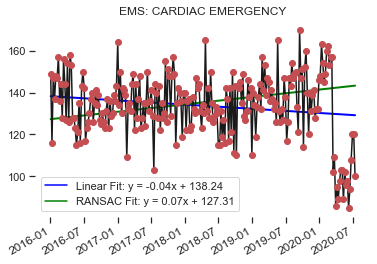

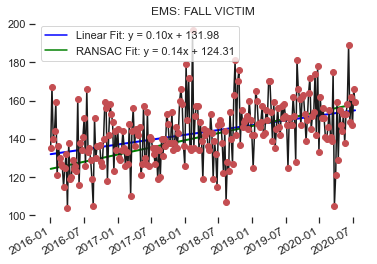

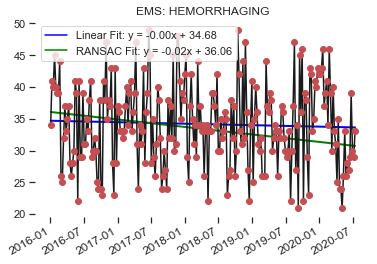

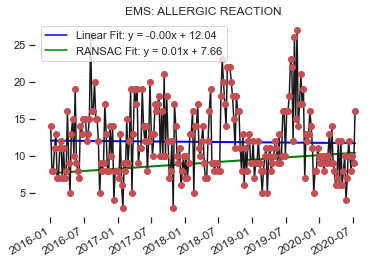

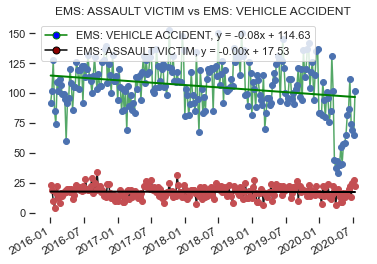

In [62]:
from sklearn import linear_model
import matplotlib.lines as mlines

def plotWLine(category='EMS: ASSAULT VICTIM'):

    
    fig, ax = plt.subplots()

    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)  



    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left() 
    plt.xticks(fontsize=12) 



    # Build Linear Fit
    Y = pp[category].values.reshape(-1,1)
    X=np.arange(Y.shape[0]).reshape(-1,1)
    model = linear_model.LinearRegression()
    model.fit(X,Y)
    m = model.coef_[0][0]
    c = model.intercept_[0]
    ax.plot(pp['timeStamp'],model.predict(X), color='blue',
             linewidth=2)
    blue_line = mlines.Line2D([], [], color='blue', label='Linear Fit: y = %2.2fx + %2.2f' % (m,c))
    

    
    # Robustly fit linear model with RANSAC algorithm
    model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression(),random_state=23)
    model_ransac.fit(X, Y)
    mr = model_ransac.estimator_.coef_[0][0]
    cr = model_ransac.estimator_.intercept_[0]
    ax.plot(pp['timeStamp'],model_ransac.predict(X), color='green',
             linewidth=2)
    green_line = mlines.Line2D([], [], color='green', label='RANSAC Fit: y = %2.2fx + %2.2f' % (mr,cr))


    
    ax.legend(handles=[blue_line,green_line], loc='best')
    

    ax.plot_date(pp['timeStamp'], pp[category],'k')
    ax.plot_date(pp['timeStamp'], pp[category],'ro')


    ax.set_title(category)
    fig.autofmt_xdate()
    plt.show()
    print('\n')


    
def plot2WLine(cat1='EMS: ASSAULT VICTIM',cat2='EMS: VEHICLE ACCIDENT'):
    
    fig, ax = plt.subplots()

    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)  



    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left() 
    plt.xticks(fontsize=12) 

    

    ax.plot_date(pp['timeStamp'], pp[cat1],'k')
    ax.plot_date(pp['timeStamp'], pp[cat1],'ro')


    ax.plot_date(pp['timeStamp'], pp[cat2],'g')
    ax.plot_date(pp['timeStamp'], pp[cat2],'bo')


    
    
# Build Linear Fit
    
    # cat 1
    Y = pp[cat1].values.reshape(-1,1)
    X=np.arange(Y.shape[0]).reshape(-1,1)
    model = linear_model.LinearRegression()
    model.fit(X,Y)
    m = model.coef_[0][0]
    c = model.intercept_[0]
    ax.plot(pp['timeStamp'],model.predict(X), color='black',
             linewidth=2)
    
    black_line = mlines.Line2D([], [], color='black', marker='o',markerfacecolor='darkred',
                               markersize=7,
                               label='%s, y = %2.2fx + %2.2f' % (cat1,m,c))
  
    # cat 2
    Y = pp[cat2].values.reshape(-1,1)
    X=np.arange(Y.shape[0]).reshape(-1,1)
    model = linear_model.LinearRegression()
    model.fit(X,Y)
    m = model.coef_[0][0]
    c = model.intercept_[0]
    ax.plot(pp['timeStamp'],model.predict(X), color='green',
             linewidth=2)
    
    green_line = mlines.Line2D([], [], color='green',marker='o',markerfacecolor='blue',
                          markersize=7, label='%s, y = %2.2fx + %2.2f' % (cat2,m,c))
  
 
    
    ax.set_title(cat1 + ' vs ' + cat2)
    ax.legend(handles=[green_line,black_line], loc='best')

    fig.autofmt_xdate()
    plt.show()
    print('\n')
       
    
# Create some plots
plotWLine('EMS: RESPIRATORY EMERGENCY')
plotWLine('EMS: NAUSEA/VOMITING')
plotWLine('EMS: CARDIAC EMERGENCY')
plotWLine('EMS: FALL VICTIM')
plotWLine('EMS: HEMORRHAGING')
plotWLine('EMS: ALLERGIC REACTION')


plot2WLine(cat1='EMS: ASSAULT VICTIM',cat2='EMS: VEHICLE ACCIDENT')
